# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from datetime import datetime
import time
import gmaps


# Import API key
from api_keys import *

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Configure Google Maps
gmaps.configure(api_key=gkey)

# Output File (CSV)
output_data_file = "output/city_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"APPID": ow_api_key, "units": "imperial"}
processed_lat = []
processed_lon = []
processed_city = []
date = []
country = []
cloudiness = []
humidity = []
maxtemp = []
windspeed = []
for num, city in enumerate(cities):
    print(f'Processing record {num} - {city}')
    try:
        data = owm.get_current(city, **settings)
        
        processed_lat.append(data['coord']['lat'])
        processed_lon.append(data['coord']['lon'])
        processed_city.append(data['name'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        cloudiness.append(data['clouds']['all'])
        humidity.append(data['main']['humidity'])
        maxtemp.append(data['main']['temp_max'])
        windspeed.append(data['wind']['speed'])
        time.sleep(2)
        
    except Exception as e:
        print('City not found... skipping')
        

Processing record 0 - kulhudhuffushi
Processing record 1 - barentsburg
HTTP Error 404: Not Found
City not found... skipping
Processing record 2 - tura
Processing record 3 - arraial do cabo
Processing record 4 - mataura
Processing record 5 - saint-francois
Processing record 6 - yellowknife
Processing record 7 - lompoc
Processing record 8 - deputatskiy
Processing record 9 - puerto ayora
Processing record 10 - pilot butte
Processing record 11 - saskylakh
Processing record 12 - husavik
Processing record 13 - cap malheureux
Processing record 14 - mitsamiouli
Processing record 15 - broome
Processing record 16 - vaini
Processing record 17 - east london
Processing record 18 - pipar
HTTP Error 404: Not Found
City not found... skipping
Processing record 19 - constitucion
Processing record 20 - esperance
Processing record 21 - wexford
Processing record 22 - rikitea
Processing record 23 - sitka
Processing record 24 - comodoro rivadavia
Processing record 25 - borisoglebsk
Processing record 26 - bus

Processing record 213 - vanavara
Processing record 214 - montepuez
Processing record 215 - lavrentiya
Processing record 216 - gambela
Processing record 217 - george
Processing record 218 - roblin
Processing record 219 - sumbawa
HTTP Error 404: Not Found
City not found... skipping
Processing record 220 - mahebourg
Processing record 221 - khandyga
Processing record 222 - girne
HTTP Error 404: Not Found
City not found... skipping
Processing record 223 - medicine hat
Processing record 224 - stokmarknes
Processing record 225 - arcata
Processing record 226 - puerto madryn
Processing record 227 - kaitangata
Processing record 228 - agirish
Processing record 229 - saint-chamond
Processing record 230 - batagay-alyta
Processing record 231 - khasan
Processing record 232 - tiete
Processing record 233 - port-de-paix
HTTP Error 404: Not Found
City not found... skipping
Processing record 234 - maracas
Processing record 235 - cedar city
Processing record 236 - ayabaca
Processing record 237 - anadyr
Pro

Processing record 426 - indramayu
Processing record 427 - westport
Processing record 428 - bilma
Processing record 429 - cockburn town
Processing record 430 - pisco
Processing record 431 - novikovo
Processing record 432 - lambarene
Processing record 433 - uni
Processing record 434 - yuancheng
HTTP Error 404: Not Found
City not found... skipping
Processing record 435 - ouadda
Processing record 436 - vaitupu
HTTP Error 404: Not Found
City not found... skipping
Processing record 437 - puerto penasco
Processing record 438 - bibiani
Processing record 439 - mandalgovi
Processing record 440 - ye
HTTP Error 404: Not Found
City not found... skipping
Processing record 441 - warqla
HTTP Error 404: Not Found
City not found... skipping
Processing record 442 - carutapera
Processing record 443 - codrington
Processing record 444 - polunochnoye
Processing record 445 - san pedro
Processing record 446 - mvuma
Processing record 447 - mamou
Processing record 448 - vydrino
Processing record 449 - longkou
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data_for_df = {
   "City": processed_city,
   "Cloudiness": cloudiness,
   "Country": country,
   "Date": date,
   "Humidity": humidity,
   "Lat": processed_lat,
   "Lng": processed_lon,
   "Max Temp": maxtemp,
   "Wind Speed": windspeed
}

city_data_df = pd.DataFrame(data_for_df)
city_data_df.to_csv(output_data_file, index=False)
city_data_df.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [5]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kulhudhuffushi,0,MV,1545530721,100,6.62,73.07,81.88,3.09
1,Tura,0,IN,1545530509,84,25.52,90.21,63.57,4.25
2,Arraial do Cabo,0,BR,1545530726,92,-22.97,-42.02,78.01,4.81
3,Mataura,0,NZ,1545530728,63,-46.19,168.86,66.27,4.25
4,Saint-Francois,90,FR,1545528600,100,46.42,3.91,48.20,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

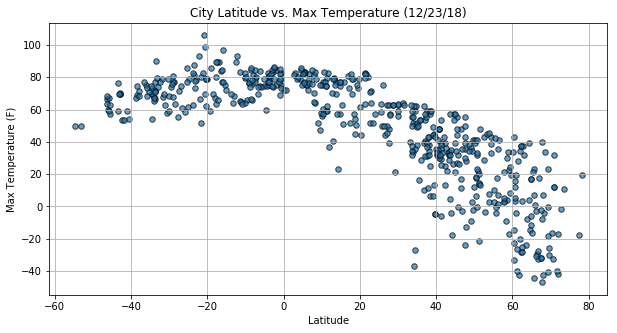

In [4]:
date_str = datetime.now().strftime('%m/%d/%y')

city_data_df = pd.read_csv(output_data_file)

city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', s=30, grid=True,
                  marker='o', figsize=(10,5), linewidths=1, facecolors='blue', edgecolors='black', alpha=.7)

plt.title(f'City Latitude vs. Max Temperature ({date_str})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('output/lat-temp.png')
plt.show()

#### Latitude vs. Humidity Plot

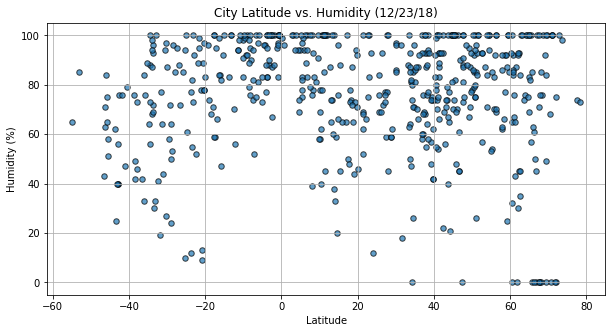

In [5]:
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', s=30, grid=True,
                  marker='o', figsize=(10,5), linewidths=1, facecolors='blue', edgecolors='black', alpha=.7)

plt.title(f'City Latitude vs. Humidity ({date_str})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('output/lat-humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

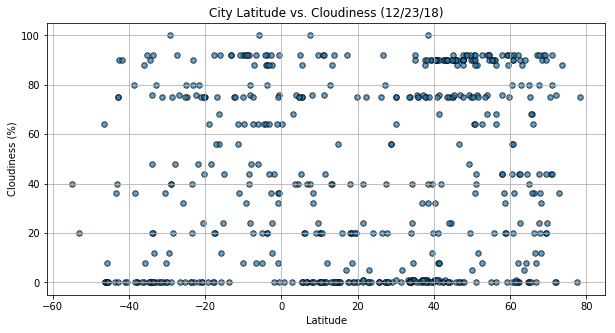

In [6]:
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', s=30, grid=True,
                  marker='o', figsize=(10,5), linewidths=1, facecolors='blue', edgecolors='black', alpha=.7)

plt.title(f'City Latitude vs. Cloudiness ({date_str})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.savefig('output/lat-cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

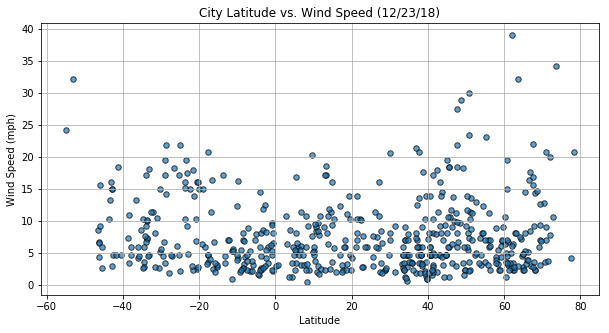

In [57]:
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', s=30, grid=True,
                  marker='o', figsize=(10,5), linewidths=1, facecolors='blue', edgecolors='black', alpha=.7)

plt.title(f'City Latitude vs. Wind Speed ({date_str})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('output/lat-windspeed.png')
plt.show()

In [66]:
# Plot Heatmap
fahr_to_kelvin = lambda f: (f - 32) * 5/9 + 273.15

# Convert temperatures to a positive scale
temps_for_map = fahr_to_kelvin(city_data_df['Max Temp'])
# Treat 65 F as pleasant temperature, for visualization
sixtyfive_in_kelvin = fahr_to_kelvin(65)
temps_for_map = temps_for_map/sixtyfive_in_kelvin

layout={ 'width': '800px', 'height': '400px' }

fig = gmaps.figure(center=(0,0), zoom_level=1.5, layout=layout)
heatmap_layer = gmaps.heatmap_layer(
    city_data_df[['Lat', 'Lng']], weights=temps_for_map, dissipating=False, max_intensity=2, point_radius=3.0)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='400px', width='800px'))

# Observations

- Cities around equator seem to be experiencing warmer temperatures
- Cities in southern hemisphere, away from equator, are also warmer as the timeframe coincides with summer, which began around Dec 1
- Cities in northern hemisphere, away from equator, are colder due to winter, which began around Dec 1.
- Latitude does not seem to have any impact on Cloudiness and Humidity
- Windspeed does seem to be impacted by latitude for most of the cities. Cities farther away from equator show higher wind speeds.
